# Overview of final presentation of Group 4

First part: Data Cleaning - by 蒋婕英

Second part: Descriptive Diagrams - by 张娴

Third part: Wordcloud - by 殷悦

Forth part: Textual Analysis & Linear Regression - by 黄煌 & 杨立汀

Fifth part: Sentiment Analysis - by 杨立汀（组长）

# First part: Data Cleaning

In [83]:
#import necessary packages
import numpy as np
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from regressors.regressors import stats
import PIL.Image as Image  
import cv2
import imageio
import re
from textblob import TextBlob
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [2]:
#use notepad++ to transform csv into utf-8-bom
#read csv
usdata = pd.read_csv('USvideos.csv')
usdata.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [3]:
usdata.shape

(40949, 16)

In [4]:
#organize the order of trending_date
usdata["trending_date"] = pd.to_datetime(usdata["trending_date"],format ="%y.%d.%m")
usdata["trending_date"] = usdata["trending_date"].dt.date
usdata.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [5]:
#tansform json into csv
jsonFile = open("US_category_id.json", "r")
categoryId = json.load(jsonFile)
with open('US_category_id.csv', 'w', newline='') as f:
    csvWriter = csv.writer(f)
    csvWriter.writerow(['id', 'category'])
    for i in categoryId['items']:
        csvWriter.writerow([i['id'], i['snippet']['title']])

In [6]:
#match category_id with category name
uscat1 = pd.read_csv('US_category_id.csv')
uscat1.columns=['category_id','category']
uscat1

category_id               category
0             1       Film & Animation
1             2       Autos & Vehicles
2            10                  Music
3            15         Pets & Animals
4            17                 Sports
5            18           Short Movies
6            19        Travel & Events
7            20                 Gaming
8            21          Videoblogging
9            22         People & Blogs
10           23                 Comedy
11           24          Entertainment
12           25        News & Politics
13           26          Howto & Style
14           27              Education
15           28   Science & Technology
16           29  Nonprofits & Activism
17           30                 Movies
18           31        Anime/Animation
19           32       Action/Adventure
20           33               Classics
21           34                 Comedy
22           35            Documentary
23           36                  Drama
24           37                 Family
25           38                Foreign
26           39                 Horror
27           40         Sci-Fi/Fantasy
28           41               Thriller
29           42                 Shorts
30           43                  Shows
31           44               Trailers

In [7]:
#find reduplicative categories
a = uscat1['category'].tolist()
source = a
from collections import defaultdict
def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() 
                            if len(locs)>1)
 
for dup in sorted(list_duplicates(source)):
    print(dup)

('Comedy', [10, 21])


In [8]:
#delete reduplicative rows
uscat1.drop(labels=None, axis=0,index=21,inplace=True)
uscat1

category_id               category
0             1       Film & Animation
1             2       Autos & Vehicles
2            10                  Music
3            15         Pets & Animals
4            17                 Sports
5            18           Short Movies
6            19        Travel & Events
7            20                 Gaming
8            21          Videoblogging
9            22         People & Blogs
10           23                 Comedy
11           24          Entertainment
12           25        News & Politics
13           26          Howto & Style
14           27              Education
15           28   Science & Technology
16           29  Nonprofits & Activism
17           30                 Movies
18           31        Anime/Animation
19           32       Action/Adventure
20           33               Classics
22           35            Documentary
23           36                  Drama
24           37                 Family
25           38                Foreign
26           39                 Horror
27           40         Sci-Fi/Fantasy
28           41               Thriller
29           42                 Shorts
30           43                  Shows
31           44               Trailers

In [9]:
#merge category into dataframe
usdf1=pd.merge(usdata,uscat1,on='category_id',how='left')
usdf1.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description        category  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs  
1  One year after the presidential election, John...   Entertainment  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy  
3  Today we find out if Link is a Nickelback amat...   Entertainment  
4  I know it's been a while since we did this sho...   Entertainment

In [10]:
#clarify publish_time and add publish_date
usdf1["publish_time"] = pd.to_datetime(usdf1["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")
usdf1["publish_date"] = usdf1["publish_time"].dt.date
usdf1.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description        category  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs   
1  One year after the presidential election, John...   Entertainment   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy   
3  Today we find out if Link is a Nickelback amat...   Entertainment   
4  I know it's been a while since we did this sho...   Entertainment   

  publish_date  
0   2017-11-13  
1   2017-11-13  
2   2017-11-12  
3   2017-11-13  
4   2017-11-12

In [11]:
#delete rows that contain null values
usdf = usdf1.dropna()
usdf.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description        category  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs   
1  One year after the presidential election, John...   Entertainment   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy   
3  Today we find out if Link is a Nickelback amat...   Entertainment   
4  I know it's been a while since we did this sho...   Entertainment   

  publish_date  
0   2017-11-13  
1   2017-11-13  
2   2017-11-12  
3   2017-11-13  
4   2017-11-12

In [12]:
#look up the type of each column
usdf.dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category                          object
publish_date                      object
dtype: object

In [13]:
#delete non-English characters
usdf.title.str.replace('[^a-zA-Z]', '')
usdf.channel_title.str.replace('[^a-zA-Z]', '')
usdf.tags.str.replace('[^a-zA-Z]', '')
usdf.thumbnail_link.str.replace('[^a-zA-Z]', '')
usdf.description.str.replace('[^a-zA-Z]', '')
usdf.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description        category  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People & Blogs   
1  One year after the presidential election, John...   Entertainment   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...          Comedy   
3  Today we find out if Link is a Nickelback amat...   Entertainment   
4  I know it's been a while since we did this sho...   Entertainment   

  publish_date  
0   2017-11-13  
1   2017-11-13  
2   2017-11-12  
3   2017-11-13  
4   2017-11-12

In [14]:
#export to excel
usdf.to_excel('US_1.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/worksheet.py:935: UserWarning: Ignoring URL 'http://readyplayeronemovie.com\nhttp://facebook.com/readyplayerone\nhttp://twitter.com/readyplayerone\nhttp://instagram.com/readyplayerone\n\n--%20\n\nFrom%20filmmaker%20Steven%20Spielberg%20comes%20the%20science%20fiction%20action%20adventure%20“Ready%20Player%20One,”%20based%20on%20Ernest%20Cline’s%20bestseller%20of%20the%20same%20name,%20which%20has%20become%20a%20worldwide%20phenomenon.%20\n\nThe%20film%20is%20set%20in%202045,%20with%20the%20world%20on%20the%20brink%20of%20chaos%20and%20collapse.%20%20But%20the%20people%20have%20found%20salvation%20in%20the%20OASIS,%20an%20expansive%20virtual%20reality%20universe%20created%20by%20the%20brilliant%20and%20eccentric%20James%20Halliday%20(Mark%20Rylance).%20%20When%20Halliday%20dies,%20he%20leaves%20his%20immense%20fortune%20to%20the%20first%20person%20to%20find%20a%20digital%20Easter%20egg%20he%20has%20hidden%20somewhere%20in%20the%20OAS

In [15]:
#following CA data cleansing steps are the same as US
cadata = pd.read_csv('CAvideos.csv')
cadata.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [16]:
cadata["trending_date"] = pd.to_datetime(cadata["trending_date"],format ="%y.%d.%m")
cadata["trending_date"] = cadata["trending_date"].dt.date
cadata.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [17]:
jsonFile = open("CA_category_id.json", "r")
categoryId = json.load(jsonFile)
with open('CA_category_id.csv', 'w', newline='') as f:
    csvWriter = csv.writer(f)
    csvWriter.writerow(['id', 'category'])
    for i in categoryId['items']:
        csvWriter.writerow([i['id'], i['snippet']['title']])

In [18]:
cacat1 = pd.read_csv('CA_category_id.csv')
cacat1.columns=['category_id','category']
cacat1

category_id              category
0             1      Film & Animation
1             2      Autos & Vehicles
2            10                 Music
3            15        Pets & Animals
4            17                Sports
5            18          Short Movies
6            19       Travel & Events
7            20                Gaming
8            21         Videoblogging
9            22        People & Blogs
10           23                Comedy
11           24         Entertainment
12           25       News & Politics
13           26         Howto & Style
14           27             Education
15           28  Science & Technology
16           30                Movies
17           31       Anime/Animation
18           32      Action/Adventure
19           33              Classics
20           34                Comedy
21           35           Documentary
22           36                 Drama
23           37                Family
24           38               Foreign
25           39                Horror
26           40        Sci-Fi/Fantasy
27           41              Thriller
28           42                Shorts
29           43                 Shows
30           44              Trailers

In [19]:
b = cacat1['category'].tolist()
source = b
from collections import defaultdict
def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() 
                            if len(locs)>1)
 
for dup in sorted(list_duplicates(source)):
    print(dup)

('Comedy', [10, 20])


In [20]:
cacat1.drop(labels=None, axis=0,index=20,inplace=True)
cacat1

category_id              category
0             1      Film & Animation
1             2      Autos & Vehicles
2            10                 Music
3            15        Pets & Animals
4            17                Sports
5            18          Short Movies
6            19       Travel & Events
7            20                Gaming
8            21         Videoblogging
9            22        People & Blogs
10           23                Comedy
11           24         Entertainment
12           25       News & Politics
13           26         Howto & Style
14           27             Education
15           28  Science & Technology
16           30                Movies
17           31       Anime/Animation
18           32      Action/Adventure
19           33              Classics
21           35           Documentary
22           36                 Drama
23           37                Family
24           38               Foreign
25           39                Horror
26           40        Sci-Fi/Fantasy
27           41              Thriller
28           42                Shorts
29           43                 Shows
30           44              Trailers

In [21]:
cadf1=pd.merge(cadata,cacat1,on='category_id',how='left')
cadf1.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description       category  
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music  
1  STill got a lot of packages. Probably will las...         Comedy  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy  
3  I know it's been a while since we did this sho...  Entertainment  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music

In [22]:
cadf1["publish_time"] = pd.to_datetime(cadf1["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")
cadf1["publish_date"] = cadf1["publish_time"].dt.date
cadf1.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id        publish_time  \
0           10 2017-11-10 17:00:03   
1           23 2017-11-13 17:00:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-12 18:01:41   
4           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description       category  \
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music   
1  STill got a lot of packages. Probably will las...         Comedy   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy   
3  I know it's been a while since we did this sho...  Entertainment   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music   

  publish_date  
0   2017-11-10  
1   2017-11-13  
2   2017-11-12  
3   2017-11-12  
4   2017-11-09

In [23]:
cadf = cadf1.dropna()
cadf.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id        publish_time  \
0           10 2017-11-10 17:00:03   
1           23 2017-11-13 17:00:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-12 18:01:41   
4           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description       category  \
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music   
1  STill got a lot of packages. Probably will las...         Comedy   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy   
3  I know it's been a while since we did this sho...  Entertainment   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music   

  publish_date  
0   2017-11-10  
1   2017-11-13  
2   2017-11-12  
3   2017-11-12  
4   2017-11-09

In [24]:
cadf.title.str.replace('[^a-zA-Z]', '')
cadf.channel_title.str.replace('[^a-zA-Z]', '')
cadf.tags.str.replace('[^a-zA-Z]', '')
cadf.thumbnail_link.str.replace('[^a-zA-Z]', '')
cadf.description.str.replace('[^a-zA-Z]', '')
cadf.head()

video_id trending_date  \
0  n1WpP7iowLc    2017-11-14   
1  0dBIkQ4Mz1M    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  d380meD0W0M    2017-11-14   
4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id        publish_time  \
0           10 2017-11-10 17:00:03   
1           23 2017-11-13 17:00:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-12 18:01:41   
4           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description       category  \
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music   
1  STill got a lot of packages. Probably will las...         Comedy   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy   
3  I know it's been a while since we did this sho...  Entertainment   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music   

  publish_date  
0   2017-11-10  
1   2017-11-13  
2   2017-11-12  
3   2017-11-12  
4   2017-11-09

In [25]:
cadf.to_excel('CA.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/worksheet.py:935: UserWarning: Ignoring URL 'http://readyplayeronemovie.com\nhttp://facebook.com/readyplayerone\nhttp://twitter.com/readyplayerone\nhttp://instagram.com/readyplayerone\n\n--%20\n\nFrom%20filmmaker%20Steven%20Spielberg%20comes%20the%20science%20fiction%20action%20adventure%20“Ready%20Player%20One,”%20based%20on%20Ernest%20Cline’s%20bestseller%20of%20the%20same%20name,%20which%20has%20become%20a%20worldwide%20phenomenon.%20\n\nThe%20film%20is%20set%20in%202045,%20with%20the%20world%20on%20the%20brink%20of%20chaos%20and%20collapse.%20%20But%20the%20people%20have%20found%20salvation%20in%20the%20OASIS,%20an%20expansive%20virtual%20reality%20universe%20created%20by%20the%20brilliant%20and%20eccentric%20James%20Halliday%20(Mark%20Rylance).%20%20When%20Halliday%20dies,%20he%20leaves%20his%20immense%20fortune%20to%20the%20first%20person%20to%20find%20a%20digital%20Easter%20egg%20he%20has%20hidden%20somewhere%20in%20the%20OAS

/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/worksheet.py:935: UserWarning: Ignoring URL 'http://www.tagthemovie.com/\nhttps://www.facebook.com/tagthemovie\nhttps://www.twitter.com/tagthemovie\nhttps://www.instagram.com/tagthemovie\n\nFor%20one%20month%20every%20year,%20five%20highly%20competitive%20friends%20hit%20the%20ground%20running%20in%20a%20no-holds-barred%20game%20of%20tag%20they’ve%20been%20playing%20since%20the%20first%20grade—risking%20their%20necks,%20their%20jobs%20and%20their%20relationships%20to%20take%20each%20other%20down%20with%20the%20battle%20cry:%20“You’re%20It!”%20%20%20\n\nThis%20year,%20the%20game%20coincides%20with%20the%20wedding%20of%20their%20only%20undefeated%20player,%20which%20should%20finally%20make%20him%20an%20easy%20target.%20%20But%20he%20knows%20they’re%20coming…and%20he’s%20ready.%20%20\n\nBased%20on%20a%20true%20story,%20the%20New%20Line%20Cinema%20comedy%20“Tag”%20shows%20how%20far%20some%20guys%20will%20go%20to%20be%20the%20last%20man%

In [26]:
#following GB data cleansing steps are the same as US as well
gbdata = pd.read_csv('GBvideos.csv')
gbdata.head()

video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs …Ready for...  
2  Eminem's new track Walk on Water ft. Beyoncé i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

In [27]:
gbdata["trending_date"] = pd.to_datetime(gbdata["trending_date"],format ="%y.%d.%m")
gbdata["trending_date"] = gbdata["trending_date"].dt.date
gbdata.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs …Ready for...  
2  Eminem's new track Walk on Water ft. Beyoncé i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

In [28]:
jsonFile = open("GB_category_id.json", "r")
categoryId = json.load(jsonFile)
with open('GB_category_id.csv', 'w', newline='') as f:
    csvWriter = csv.writer(f)
    csvWriter.writerow(['id', 'category'])
    for i in categoryId['items']:
        csvWriter.writerow([i['id'], i['snippet']['title']])

In [29]:
gbcat1 = pd.read_csv('GB_category_id.csv')
gbcat1.columns=['category_id','category']
gbcat1

category_id              category
0             1      Film & Animation
1             2      Autos & Vehicles
2            10                 Music
3            15        Pets & Animals
4            17                Sports
5            18          Short Movies
6            19       Travel & Events
7            20                Gaming
8            21         Videoblogging
9            22        People & Blogs
10           23                Comedy
11           24         Entertainment
12           25       News & Politics
13           26         Howto & Style
14           27             Education
15           28  Science & Technology
16           30                Movies
17           31       Anime/Animation
18           32      Action/Adventure
19           33              Classics
20           34                Comedy
21           35           Documentary
22           36                 Drama
23           37                Family
24           38               Foreign
25           39                Horror
26           40        Sci-Fi/Fantasy
27           41              Thriller
28           42                Shorts
29           43                 Shows
30           44              Trailers

In [30]:
c = gbcat1['category'].tolist()
source = c
from collections import defaultdict
def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() 
                            if len(locs)>1)
 
for dup in sorted(list_duplicates(source)):
    print(dup)

('Comedy', [10, 20])


In [31]:
gbcat1.drop(labels=None, axis=0,index=20,inplace=True)
gbcat1

category_id              category
0             1      Film & Animation
1             2      Autos & Vehicles
2            10                 Music
3            15        Pets & Animals
4            17                Sports
5            18          Short Movies
6            19       Travel & Events
7            20                Gaming
8            21         Videoblogging
9            22        People & Blogs
10           23                Comedy
11           24         Entertainment
12           25       News & Politics
13           26         Howto & Style
14           27             Education
15           28  Science & Technology
16           30                Movies
17           31       Anime/Animation
18           32      Action/Adventure
19           33              Classics
21           35           Documentary
22           36                 Drama
23           37                Family
24           38               Foreign
25           39                Horror
26           40        Sci-Fi/Fantasy
27           41              Thriller
28           42                Shorts
29           43                 Shows
30           44              Trailers

In [32]:
gbdf1=pd.merge(gbdata,gbcat1,on='category_id',how='left')
gbdf1.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description         category  
0  Click here to continue the story and make your...    Howto & Style  
1  Musical guest Taylor Swift performs …Ready for...    Entertainment  
2  Eminem's new track Walk on Water ft. Beyoncé i...            Music  
3  Salford drew 4-4 against the Class of 92 and F...           Sports  
4  Dashcam captures truck's near miss with child ...  News & Politics

In [33]:
gbdf1["publish_time"] = pd.to_datetime(gbdf1["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")
gbdf1["publish_date"] = gbdf1["publish_time"].dt.date
gbdf1.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description         category  \
0  Click here to continue the story and make your...    Howto & Style   
1  Musical guest Taylor Swift performs …Ready for...    Entertainment   
2  Eminem's new track Walk on Water ft. Beyoncé i...            Music   
3  Salford drew 4-4 against the Class of 92 and F...           Sports   
4  Dashcam captures truck's near miss with child ...  News & Politics   

  publish_date  
0   2017-11-10  
1   2017-11-12  
2   2017-11-10  
3   2017-11-13  
4   2017-11-13

In [34]:
gbdf = gbdf1.dropna()
gbdf.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description         category  \
0  Click here to continue the story and make your...    Howto & Style   
1  Musical guest Taylor Swift performs …Ready for...    Entertainment   
2  Eminem's new track Walk on Water ft. Beyoncé i...            Music   
3  Salford drew 4-4 against the Class of 92 and F...           Sports   
4  Dashcam captures truck's near miss with child ...  News & Politics   

  publish_date  
0   2017-11-10  
1   2017-11-12  
2   2017-11-10  
3   2017-11-13  
4   2017-11-13

In [35]:
gbdf.title.str.replace('[^a-zA-Z]', '')
gbdf.channel_title.str.replace('[^a-zA-Z]', '')
gbdf.tags.str.replace('[^a-zA-Z]', '')
gbdf.thumbnail_link.str.replace('[^a-zA-Z]', '')
gbdf.description.str.replace('[^a-zA-Z]', '')
gbdf.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id        publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29   
1         Saturday Night Live           24 2017-11-12 06:24:44   
2                  EminemVEVO           10 2017-11-10 17:00:03   
3  Salford City Football Club           17 2017-11-13 02:30:38   
4            Cute Girl Videos           25 2017-11-13 01:45:13   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description         category  \
0  Click here to continue the story and make your...    Howto & Style   
1  Musical guest Taylor Swift performs …Ready for...    Entertainment   
2  Eminem's new track Walk on Water ft. Beyoncé i...            Music   
3  Salford drew 4-4 against the Class of 92 and F...           Sports   
4  Dashcam captures truck's near miss with child ...  News & Politics   

  publish_date  
0   2017-11-10  
1   2017-11-12  
2   2017-11-10  
3   2017-11-13  
4   2017-11-13

In [36]:
gbdf.to_excel('GB.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/worksheet.py:935: UserWarning: Ignoring URL 'http://readyplayeronemovie.com\nhttp://facebook.com/readyplayerone\nhttp://twitter.com/readyplayerone\nhttp://instagram.com/readyplayerone\n\n--%20\n\nFrom%20filmmaker%20Steven%20Spielberg%20comes%20the%20science%20fiction%20action%20adventure%20“Ready%20Player%20One,”%20based%20on%20Ernest%20Cline’s%20bestseller%20of%20the%20same%20name,%20which%20has%20become%20a%20worldwide%20phenomenon.%20\n\nThe%20film%20is%20set%20in%202045,%20with%20the%20world%20on%20the%20brink%20of%20chaos%20and%20collapse.%20%20But%20the%20people%20have%20found%20salvation%20in%20the%20OASIS,%20an%20expansive%20virtual%20reality%20universe%20created%20by%20the%20brilliant%20and%20eccentric%20James%20Halliday%20(Mark%20Rylance).%20%20When%20Halliday%20dies,%20he%20leaves%20his%20immense%20fortune%20to%20the%20first%20person%20to%20find%20a%20digital%20Easter%20egg%20he%20has%20hidden%20somewhere%20in%20the%20OAS

/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/worksheet.py:935: UserWarning: Ignoring URL 'https://www.playstation.com/en-us/games/tetris-effect-ps4From%20Tetsuya%20Mizuguchi%20and%20the%20same%20people%20who%20brought%20you%20the%20award-winning%20Rez%20Infinite%20and%20Lumines%20comes%20the%20new%20PS4%20game%20TETRIS®%20EFFECT.Named%20after%20a%20real-world%20phenomenon%20where%20players’%20brains%20are%20so%20engrossed%20that%20images%20of%20the%20iconic%20falling%20Tetrimino%20blocks%20(i.e.%20the%20Tetris%20playing%20pieces)%20linger%20in%20their%20vision,%20thoughts,%20and%20even%20dreams,%20TETRIS%20EFFECT%20amplifies%20this%20magical%20feeling%20of%20total%20immersion%20by%20surrounding%20you%20with%20fantastic,%20fully%20three-dimensional%20worlds%20that%20react%20and%20evolve%20based%20on%20how%20you%20play.%20Music,%20backgrounds,%20sounds,%20special%20effects—everything,%20down%20to%20the%20Tetris%20pieces%20themselves,%20pulse,%20dance,%20shimmer,%20and%20explode%

Other data cleansing work is conducted in Notepad++ and Excel.

# Second part: Descriptive Diagrams

In [37]:
df_CA = pd.read_excel('CA.xlsx')
df_GB = pd.read_excel('GB.xlsx')
df_US = pd.read_excel('US.xlsx')

### 每种视频分类的播放量、评论数、点赞数、点踩数排名

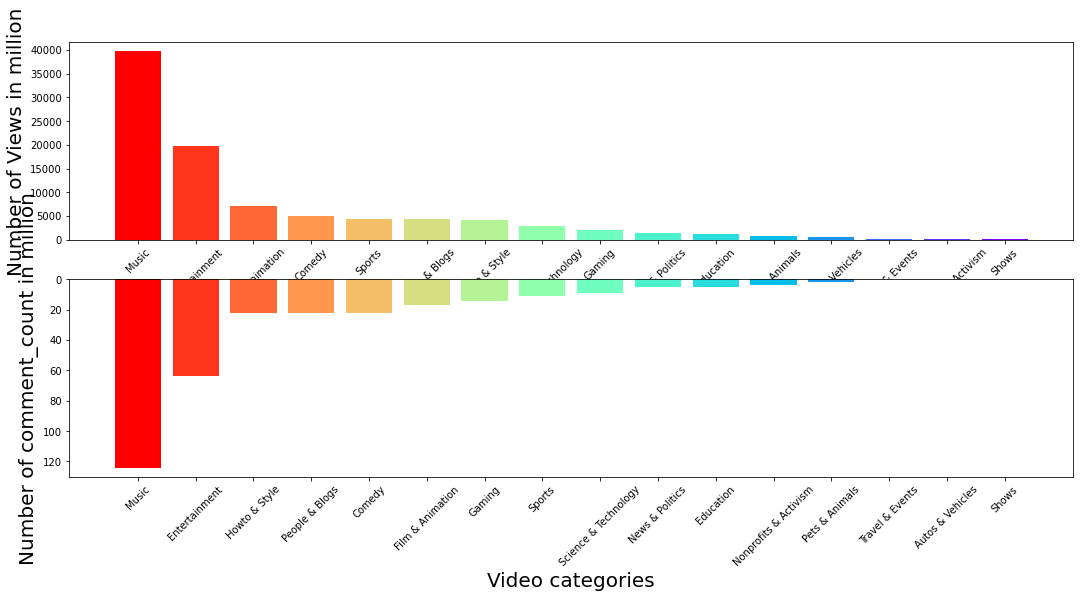

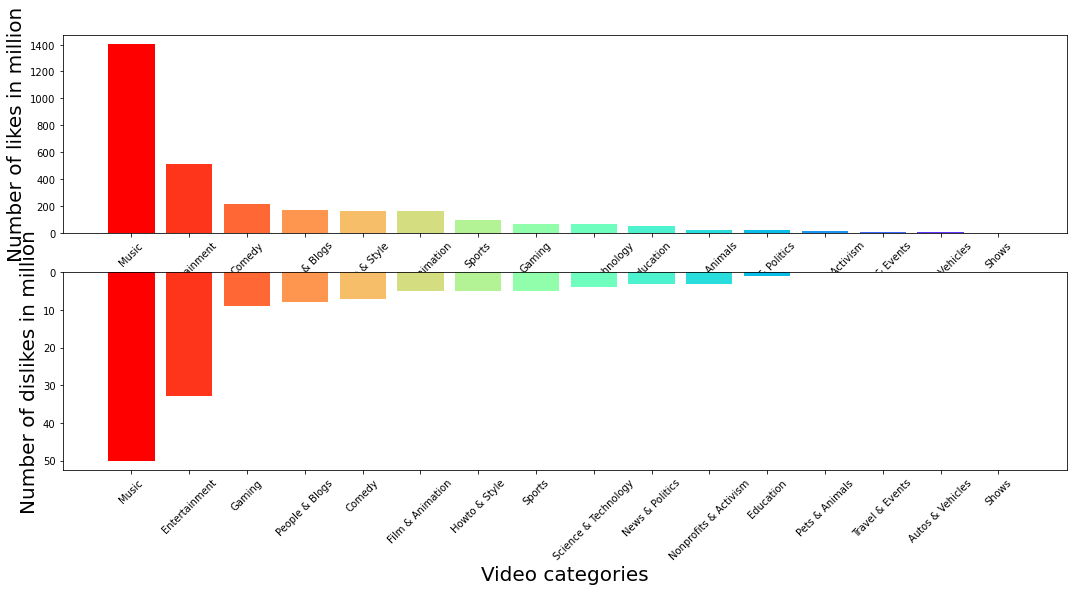

In [38]:
# 美国

views_perc = df_US.groupby(by=['category'],as_index=False).views.sum()  #播放量按category求和
comment_count_perc = df_US.groupby(by=['category'],as_index=False).comment_count.sum()
likes_perc = df_US.groupby(by=['category'],as_index=False).likes.sum()
dislikes_perc = df_US.groupby(by=['category'],as_index=False).dislikes.sum()

views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]  #处理播放量数据以百万为单位
comment_count_perc_m = [int(comment_count/1000000) for comment_count in comment_count_perc.sort_values(by='comment_count').comment_count.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
dislikes_perc_m = [int(dislikes/1000000) for dislikes in dislikes_perc.sort_values(by='dislikes').dislikes.values]

cat_val1_1=views_perc.sort_values(by='views').category.values   #将视频分类按播放量排序
cat_val1_2=comment_count_perc.sort_values(by='comment_count').category.values
cat_val1_3=likes_perc.sort_values(by='likes').category.values
cat_val1_4=dislikes_perc.sort_values(by='dislikes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)  #确定图的大小形状

cmap1 = plt.get_cmap('rainbow')  #颜色
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))] 

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)  #确定柱形图x,y轴
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=45)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()   #翻转x轴

ax1_2.bar(cat_val1_2,comment_count_perc_m,color=colors1_1)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=45)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of comment_count in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

fig,[ax1_3,ax1_4]=plt.subplots(figsize=(18,8),nrows=2,ncols=1) 
ax1_3.bar(cat_val1_3,likes_perc_m,color=colors1_1) 
ax1_3.set_xticks(range(len(cat_val1_3)))
ax1_3.set_xticklabels(cat_val1_3,rotation=45)
ax1_3.set_xlabel('Video categories',fontsize=20)
ax1_3.set_ylabel('Number of likes in million',fontsize=20)
ax1_3.invert_xaxis() 

ax1_4.bar(cat_val1_4,dislikes_perc_m,color=colors1_1)
ax1_4.set_xticks(range(len(cat_val1_4)))
ax1_4.set_xticklabels(cat_val1_4,rotation=45)
ax1_4.set_xlabel('Video categories',fontsize=20)
ax1_4.set_ylabel('Number of dislikes in million',fontsize=20)
ax1_4.invert_xaxis()
ax1_4.invert_yaxis()

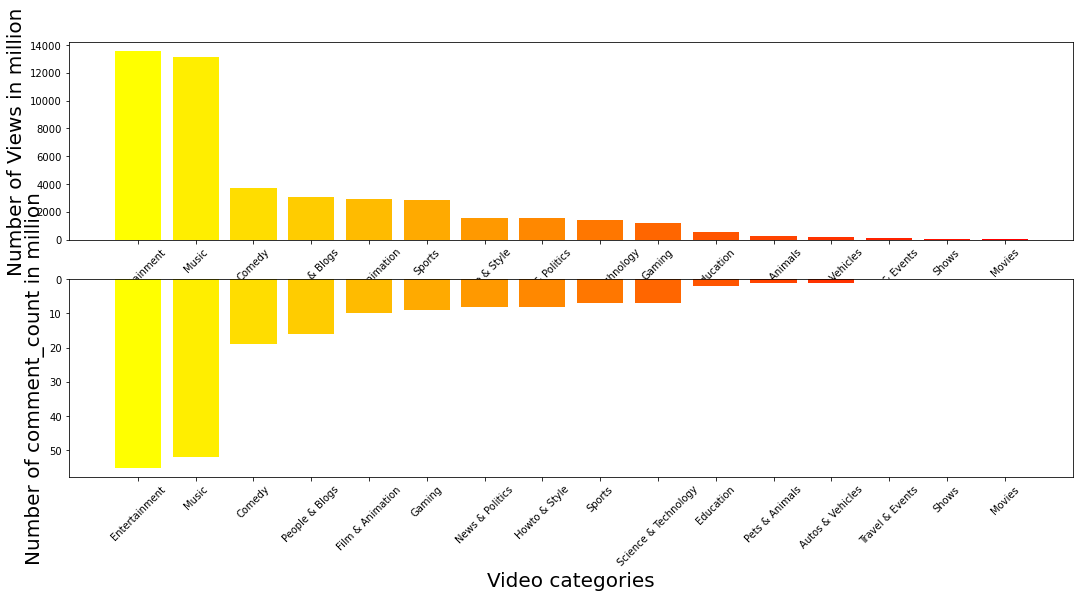

In [39]:
# 加拿大

views_perc = df_CA.groupby(by=['category'],as_index=False).views.sum()  #播放量按category求和
comment_count_perc = df_CA.groupby(by=['category'],as_index=False).comment_count.sum()
likes_perc = df_CA.groupby(by=['category'],as_index=False).likes.sum()
dislikes_perc = df_CA.groupby(by=['category'],as_index=False).dislikes.sum()

views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]  #处理播放量数据以百万为单位
comment_count_perc_m = [int(comment_count/1000000) for comment_count in comment_count_perc.sort_values(by='comment_count').comment_count.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
dislikes_perc_m = [int(dislikes/1000000) for dislikes in dislikes_perc.sort_values(by='dislikes').dislikes.values]

cat_val1_1=views_perc.sort_values(by='views').category.values   #将视频分类按播放量排序
cat_val1_2=comment_count_perc.sort_values(by='comment_count').category.values
cat_val1_3=likes_perc.sort_values(by='likes').category.values
cat_val1_4=dislikes_perc.sort_values(by='dislikes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)  #确定图的大小形状

cmap1 = plt.get_cmap('autumn')  #颜色
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))] 

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)  #确定柱形图x,y轴
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=45)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()   #翻转x轴

ax1_2.bar(cat_val1_2,comment_count_perc_m,color=colors1_1)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=45)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of comment_count in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

fig,[ax1_3,ax1_4]=plt.subplots(figsize=(18,8),nrows=2,ncols=1) 
ax1_3.bar(cat_val1_3,likes_perc_m,color=colors1_1) 
ax1_3.set_xticks(range(len(cat_val1_3)))
ax1_3.set_xticklabels(cat_val1_3,rotation=45)
ax1_3.set_xlabel('Video categories',fontsize=20)
ax1_3.set_ylabel('Number of likes in million',fontsize=20)
ax1_3.invert_xaxis() 

ax1_4.bar(cat_val1_4,dislikes_perc_m,color=colors1_1)
ax1_4.set_xticks(range(len(cat_val1_4)))
ax1_4.set_xticklabels(cat_val1_4,rotation=45)
ax1_4.set_xlabel('Video categories',fontsize=20)
ax1_4.set_ylabel('Number of dislikes in million',fontsize=20)
ax1_4.invert_xaxis()
ax1_4.invert_yaxis()

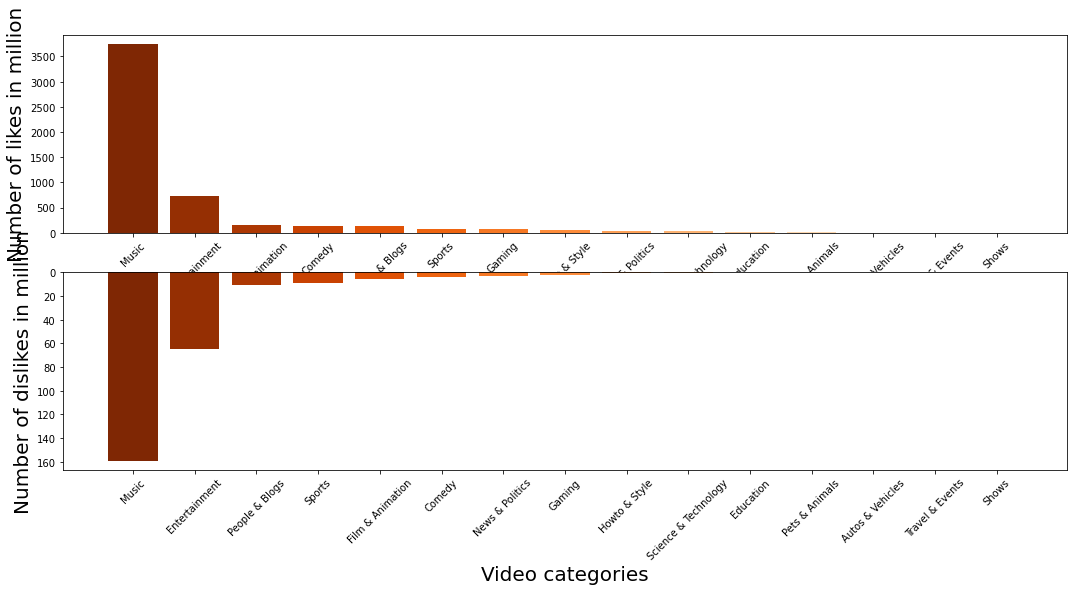

In [40]:
# 英国
views_perc = df_GB.groupby(by=['category'],as_index=False).views.sum()  #播放量按category求和
comment_count_perc = df_GB.groupby(by=['category'],as_index=False).comment_count.sum()
likes_perc = df_GB.groupby(by=['category'],as_index=False).likes.sum()
dislikes_perc = df_GB.groupby(by=['category'],as_index=False).dislikes.sum()

views_perc_m = [int(views/1000000) for views in views_perc.sort_values(by='views').views.values]  #处理播放量数据以百万为单位
comment_count_perc_m = [int(comment_count/1000000) for comment_count in comment_count_perc.sort_values(by='comment_count').comment_count.values]
likes_perc_m = [int(likes/1000000) for likes in likes_perc.sort_values(by='likes').likes.values]
dislikes_perc_m = [int(dislikes/1000000) for dislikes in dislikes_perc.sort_values(by='dislikes').dislikes.values]

cat_val1_1=views_perc.sort_values(by='views').category.values   #将视频分类按播放量排序
cat_val1_2=comment_count_perc.sort_values(by='comment_count').category.values
cat_val1_3=likes_perc.sort_values(by='likes').category.values
cat_val1_4=dislikes_perc.sort_values(by='dislikes').category.values

fig,[ax1_1,ax1_2]=plt.subplots(figsize=(18,8),nrows=2,ncols=1)  #确定图的大小形状

cmap1 = plt.get_cmap('Oranges')  #颜色
colors1_1=[cmap1(i) for i in np.linspace(0, 1, len(cat_val1_1))] 

ax1_1.bar(cat_val1_1,views_perc_m,color=colors1_1)  #确定柱形图x,y轴
ax1_1.set_xticks(range(len(cat_val1_1)))
ax1_1.set_xticklabels(cat_val1_1,rotation=45)
ax1_1.set_xlabel('Video categories',fontsize=20)
ax1_1.set_ylabel('Number of Views in million',fontsize=20)
ax1_1.invert_xaxis()   #翻转x轴

ax1_2.bar(cat_val1_2,comment_count_perc_m,color=colors1_1)
ax1_2.set_xticks(range(len(cat_val1_2)))
ax1_2.set_xticklabels(cat_val1_2,rotation=45)
ax1_2.set_xlabel('Video categories',fontsize=20)
ax1_2.set_ylabel('Number of comment_count in million',fontsize=20)
ax1_2.invert_xaxis()
ax1_2.invert_yaxis()

fig,[ax1_3,ax1_4]=plt.subplots(figsize=(18,8),nrows=2,ncols=1) 
ax1_3.bar(cat_val1_3,likes_perc_m,color=colors1_1) 
ax1_3.set_xticks(range(len(cat_val1_3)))
ax1_3.set_xticklabels(cat_val1_3,rotation=45)
ax1_3.set_xlabel('Video categories',fontsize=20)
ax1_3.set_ylabel('Number of likes in million',fontsize=20)
ax1_3.invert_xaxis() 

ax1_4.bar(cat_val1_4,dislikes_perc_m,color=colors1_1)
ax1_4.set_xticks(range(len(cat_val1_4)))
ax1_4.set_xticklabels(cat_val1_4,rotation=45)
ax1_4.set_xlabel('Video categories',fontsize=20)
ax1_4.set_ylabel('Number of dislikes in million',fontsize=20)
ax1_4.invert_xaxis()
ax1_4.invert_yaxis()

### 图中分别描述了三个国家各视频分类的播放量、评论数、点赞数、点踩数排名。可以看出播放量、评论数、点赞数、点踩数四个数据都呈现正相关性，播放量高的视频会有高评论数和点赞数，同时标记不喜欢的人也会更多。三个国家的喜好有一定的一致性。音乐和娱乐类视频都有领先的数据，美国与英国都是音乐类视频第一，娱乐类视频第二；而加拿大是娱乐类视频第一，音乐类视频第二。

## 视频发布至上榜用时排名

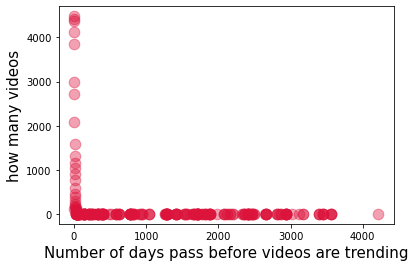

In [41]:
#美国
df_US['day_use'] = (df_US['trending_date'] - df_US['publish_date']).dt.days  #计算上榜用时天数
df_count =df_US['day_use'].value_counts().rename_axis('long').reset_index(name='counts')   #计算重复项并生成新列填入DataFtame

days = df_count['long']
count =  df_count['counts']

plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2  #圆圈大小

plt.scatter(days, count, s=area, c=colors2, alpha=0.4)  #散点图

In [42]:
#加拿大
df_CA['day_use'] = (df_CA['trending_date'] - df_CA['publish_date']).dt.days  #计算上榜用时天数
df_count =df_CA['day_use'].value_counts().rename_axis('long').reset_index(name='counts')   #计算重复项并生成新列填入DataFtame

days = df_count['long']
count =  df_count['counts']

plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2 

plt.scatter(days, count, s=area, c=colors2, alpha=0.4) 

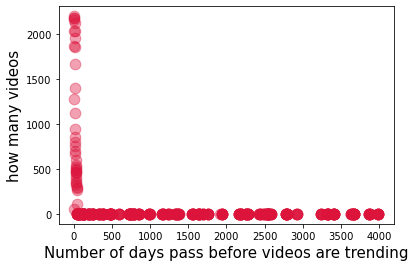

In [43]:
#英国
df_GB['day_use'] = (df_GB['trending_date'] - df_GB['publish_date']).dt.days  #计算上榜用时天数
df_count =df_GB['day_use'].value_counts().rename_axis('long').reset_index(name='counts')   #计算重复项并生成新列填入DataFtame

days = df_count['long']
count =  df_count['counts']

plt.xlabel('Number of days pass before videos are trending',fontsize=15)
plt.ylabel('how many videos',fontsize=15)

colors2 = '#DC143C'
area = np.pi * 6**2

plt.scatter(days, count, s=area, c=colors2, alpha=0.4)

### 通过散点图，展现了各个国家上榜视频从发布至上榜所需要的时间。可以看出榜单中的视频，从发布到上榜所需的时间差距非常大，从当日上榜到几年不等。但是绝大部分上榜视频从发布之初就受到欢迎，这一点在美国和德国的上榜视频中最为明显。（由于视频从发布至上榜所需要的时间差距太大，X轴每单位为500天，而绝大部分的上榜视频所需天数是个位数，所以Y轴有很大重叠）

## 上榜视频当日发布时间分布

In [44]:
#美国
df_US['hours'] = df_US['publish_time'].dt.hour  #提取小时
hours,times=zip(*sorted(df_US['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))  #计算各小时出现的次数并将数据打包

fig,ax3=plt.subplots(figsize=(18,8))  #确定图的大小形状

cmap3 = plt.get_cmap('rainbow')  #颜色
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

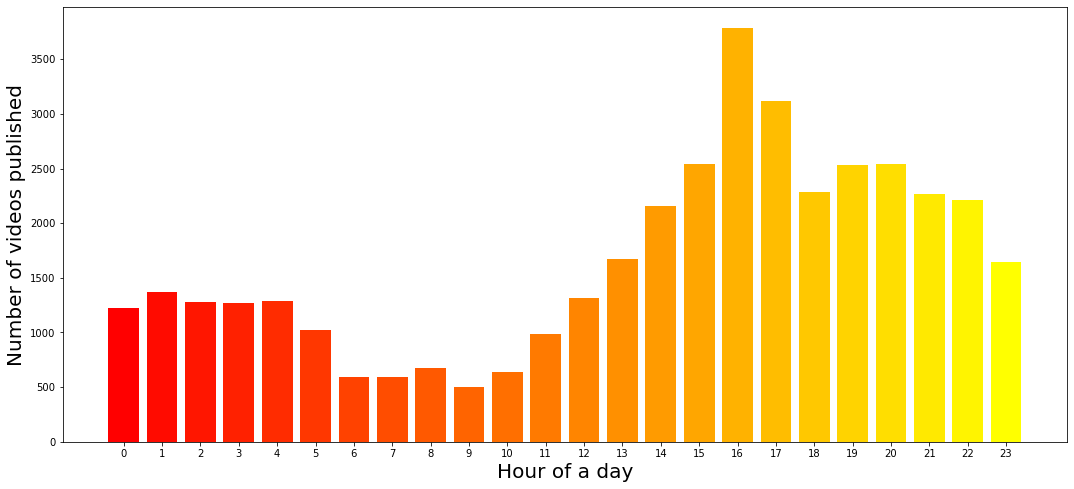

In [45]:
#加拿大
df_CA['hours'] = df_CA['publish_time'].dt.hour  #提取小时
hours,times=zip(*sorted(df_CA['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))  #计算各小时出现的次数并将数据打包

fig,ax3=plt.subplots(figsize=(18,8))  #确定图的大小形状

cmap3 = plt.get_cmap('autumn')  #颜色
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

In [46]:
#英国
df_GB['hours'] = df_GB['publish_time'].dt.hour  #提取小时
hours,times=zip(*sorted(df_GB['hours'].value_counts().to_dict().items(),key=lambda val:val[0]))  #计算各小时出现的次数并将数据打包

fig,ax3=plt.subplots(figsize=(18,8))  #确定图的大小形状

cmap3 = plt.get_cmap('Oranges')  #颜色
colors3=[cmap3(i) for i in np.linspace(0, 1, len(hours))]

ax3.bar(hours,times,color=colors3)
ax3.set_xticks(range(len(hours)))
ax3.set_xticklabels(hours)
ax3.set_xlabel('Hour of a day',fontsize=20)
ax3.set_ylabel('Number of videos published',fontsize=20);

### 图中描述了各国上榜视频在发布当天选择的时间段。可以看出三个国家发布视频最多的时间段都是在下午4点至5点，大部分上榜视频发布在傍晚，在早上6点至10点的视频发布数量最少。这说明视频的发布时间会对其传播有一定的影响。另外，进一步推测，如果视频的发布时间反应了人们更有可能在休闲娱乐的时间段，三个国家的上榜视频发布的时间段分布有相似性，那么说明他们的国民生活规律也有一定相似性，放松观看视频的时间比较接近。（英国的上榜视频中，发布在凌晨4-5点的视频数相对较多，可能英国人比美国人加拿大人晚睡。）

## Third part-Wordcloud

# 1. 词云代码

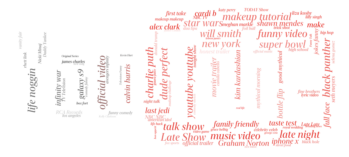

In [47]:
#将excel的列数据提取出来存到text变量里
data = pd.read_excel(r'US.xlsx')
a=data["tags"]
text1=[]
n=0
for i in a:
    text1.append(i)
    n+=1

#将变量text从list转换为str，用逗号分隔
text1= ",".join(str(i) for i in text1)  

#制作词云
color_mask = imageio.imread("test-2.png")#背景图片
wc = WordCloud(background_color="white",#设置底色
                    width=700,
                    height=300,
                    max_words=1000,#设置最大词量
                    max_font_size=15,#设置最大字号
                    mask=color_mask, #词云形状
                    repeat=True,
                    scale=10, #数值越大，产生的图片分辨率越高，字迹越清晰
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text1)
image_colors =ImageColorGenerator(color_mask) #从背景图建立颜色方案
wc.recolor(color_func=image_colors) #将词云颜色设置为背景图方案

#显示词云
plt.axis("off")#关闭坐标轴
plt.imshow(wc,interpolation='bilinear')

#保存词云
wc.to_file('测试.png')

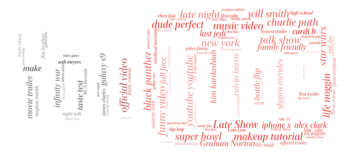

In [48]:
color_mask = imageio.imread("test-2.png")
wc = WordCloud(background_color="white",
                    
                    width=700,
                    height=300,
                    max_words=6000,
                    max_font_size=15,
                    mask=color_mask,
                    repeat=True,
               
                    scale=10, #数值越大，产生的图片分辨率越高，字迹越清晰
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text1)

#从背景图建立颜色方案
image_colors =ImageColorGenerator(color_mask) 
#将词云颜色设置为背景图方案
wc.recolor(color_func=image_colors) 

#关闭坐标轴
plt.axis("off")
#显示词云
plt.imshow(wc,interpolation='bilinear')
wc.to_file('测试.png')

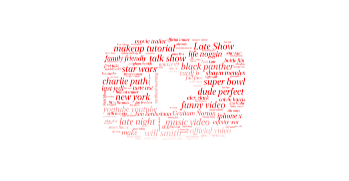

In [49]:
color_mask = imageio.imread("timg-2.png")
wc = WordCloud(background_color="white",
                    
                    width=700,
                    height=300,
                    max_words=4000,
                    max_font_size=20,
                    mask=color_mask,
                    repeat=True,
               
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text1)
image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 
plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('logo测试.png')

第二部分（tags形成词云的小结）：
👉各国总结：
1. 美国的热门标签：运动（super bowl)、美妆(makeup tutorial)、粉丝文化（星球大战、漫威电影）、音乐(Charlie Puth,Cardi B,Nicki Minaj)、脱口秀（talk show,Graham Norton, late show)等；
2. 加拿大的热门标签：印度文化（punjabi)、网红(Logan Paul,Gordon Ramsay)等、脱口秀（talk show,late show)等；
3. 英国的热门标签：粉丝文化（星球大战、漫威电影）、音乐(Charlie Puth,Cardi B,Katy Perry)、脱口秀（talk show,late show)等。

👉相似之处：
1. “无聊”的人总是特别多：对funny video、music video、late night show有着共同的爱好；
2. 漫威、星战文化盛行：星战系列电影、漫威系列电影热度极高；
3. 流行音乐品味高度一致。

👉不同之处：
1. 美国年轻人热爱美妆视频(makeup tutorial)，网红营销影响力最大；
2. 加拿大被称为“移民的国家”，文化的多元性极为突出：punjabi(南亚民族)、doki doki(日本)等舶来文化共同组成了热门标签；
3. 英国人个性严谨、重视版权：Official Video标签量显著高于其他三国。



# 2.1 美国🇺🇸tags形成的词云

In [50]:
color_mask = imageio.imread("usmap.png")
wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=25,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text1)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('wordcloud-usmap.png')

# 2.2 英国🇬🇧tags形成的词云

In [51]:
data_gb = pd.read_excel(r'GB.xlsx')
b=data_gb["tags"]
text_gbtags=[]
n=0
for i in b:
    text_gbtags.append(i)
    n+=1

text_gbtags= ",".join(str(i) for i in text_gbtags)  
color_mask = imageio.imread("gbmap.png")
wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=25,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text_gbtags)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('wordcloud-gbmap.png')

# 2.3 加拿大🇨🇦tags形成的词云

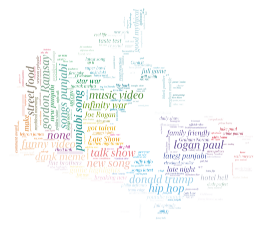

In [52]:
data_ca = pd.read_excel(r'CA.xlsx')
c=data_ca["tags"]
text_catags=[]
n=0
for i in c:
    text_catags.append(i)
    n+=1

text_catags= ",".join(str(i) for i in text_catags)  
color_mask = imageio.imread("camap.png")
wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=25,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text_catags)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('wordcloud-camap.png')

第二部分（description形成词云的小结）：
👉总体而言，差异不大，主要内容集中在以下方面：
1. 表面该视频的内容“不容错过”：check, see, getty等
1. 鼓励观众关注该频道(subscribe)
2. 推广该youtuber的其他社交媒体账号（twitter，Instagram等）

# 3.1 美国🇺🇸description形成的词云

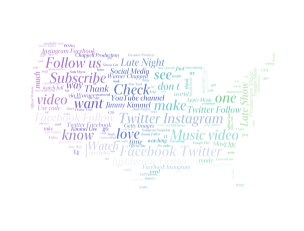

In [53]:
df = pd.read_excel('US.xlsx')
description_us = df['description']
des = []
for i in range(39065):
    string = description_us[i]
    string = re.sub(r'\\n','\n',string)
    string = re.sub(r'-','\n',string)
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    string = re.sub(results,'',string)
    string.rstrip() 
    for ch in '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?':
        string = string.replace(ch," ")
    des.append(string.split())


list_usdes = [x for j in des for x in j]
list_usdes

from wordcloud import WordCloud
temp_list=list_usdes
line="\n".join(temp_list)
color_mask = imageio.imread("usmap.png")


wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=25,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(line)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('usdestest.png')

# 3.2 英国🇬🇧description形成的词云

In [54]:
df = pd.read_excel('GB.xlsx')
description_gb = df['description']
des = []
for i in range(36446):
    string = description_gb[i]
    string = re.sub(r'\\n','\n',string)
    string = re.sub(r'-','\n',string)
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    string = re.sub(results,'',string)
    string.rstrip() 
    for ch in '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?':
        string = string.replace(ch," ")
    des.append(string.split())

list_gbdes = [x for j in des for x in j]
list_gbdes

from wordcloud import WordCloud
temp_list=list_gbdes
line="\n".join(temp_list)
color_mask = imageio.imread("gbmap.png")


wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=25,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(line)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('gbdestest.png')


TypeError: expected string or bytes-like object

#### 备注：由于未知原因，上述代码在组长电脑上运行报错，故贴上其他组员运行相同代码的结果

# 3.3 加拿大🇨🇦description形成的词云

In [55]:
df = pd.read_excel('CA.xlsx')
description_ca = df['description']
des = []
for i in range(36446):
    string = description_ca[i]
    string = re.sub(r'\\n','\n',string)
    string = re.sub(r'-','\n',string)
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    string = re.sub(results,'',string)
    string.rstrip() 
    for ch in '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?':
        string = string.replace(ch," ")
    #words = string.split()
    des.append(string.split())
    #print(des)
    #des_length.append(len(words))
    #print(len(words))
    #des_length

list_cades = [x for j in des for x in j]
list_cades

from wordcloud import WordCloud
temp_list=list_cades
line="\n".join(temp_list)
color_mask = imageio.imread("camap.png")


wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=25,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(line)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('cadestest.png')





TypeError: expected string or bytes-like object

#### 备注：由于未知原因，上述代码在组长电脑上运行报错，故贴上其他组员运行相同代码的结果

# 4. 对美、英、加最热门的category--music的词云绘制（只是展示）

In [56]:
CA = pd.read_excel('CA.xlsx')
GB = pd.read_excel('GB.xlsx')
US = pd.read_excel('US.xlsx')
data = pd.concat([CA, GB, US])
ctg = data.loc[data['category']=='Music']['tags']
ctg.reset_index().head()

index                                               tags
0      0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...
1      4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...
2     10  21 savage|"bank account"|"21 savage bank accou...
3     13  punjabi songs|"punjabi bhangra"|"punjabi music...
4     29  Telefoon|"Babbu Maan"|"Mehfil Mitran Di"|"new ...

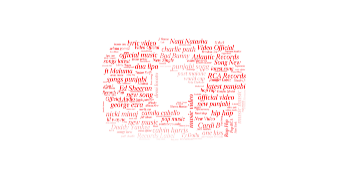

In [57]:

text_ctg=[]
n=0
for i in ctg:
    text_ctg.append(i)
    n+=1

text_ctg= ",".join(str(i) for i in text_ctg)  
color_mask = imageio.imread("timg-2.png")
wc = WordCloud(background_color="white",
                    width=700,
                    height=300,
                    max_words=2000,
                    max_font_size=15,
                    mask=color_mask,
                    repeat=True,
                    scale=10, 
                    font_path='/Library/Fonts/NewYorkItalic.ttf')
wc.generate(text_ctg)

image_colors =ImageColorGenerator(color_mask) 
wc.recolor(color_func=image_colors) 

plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
wc.to_file('music-t2.png')

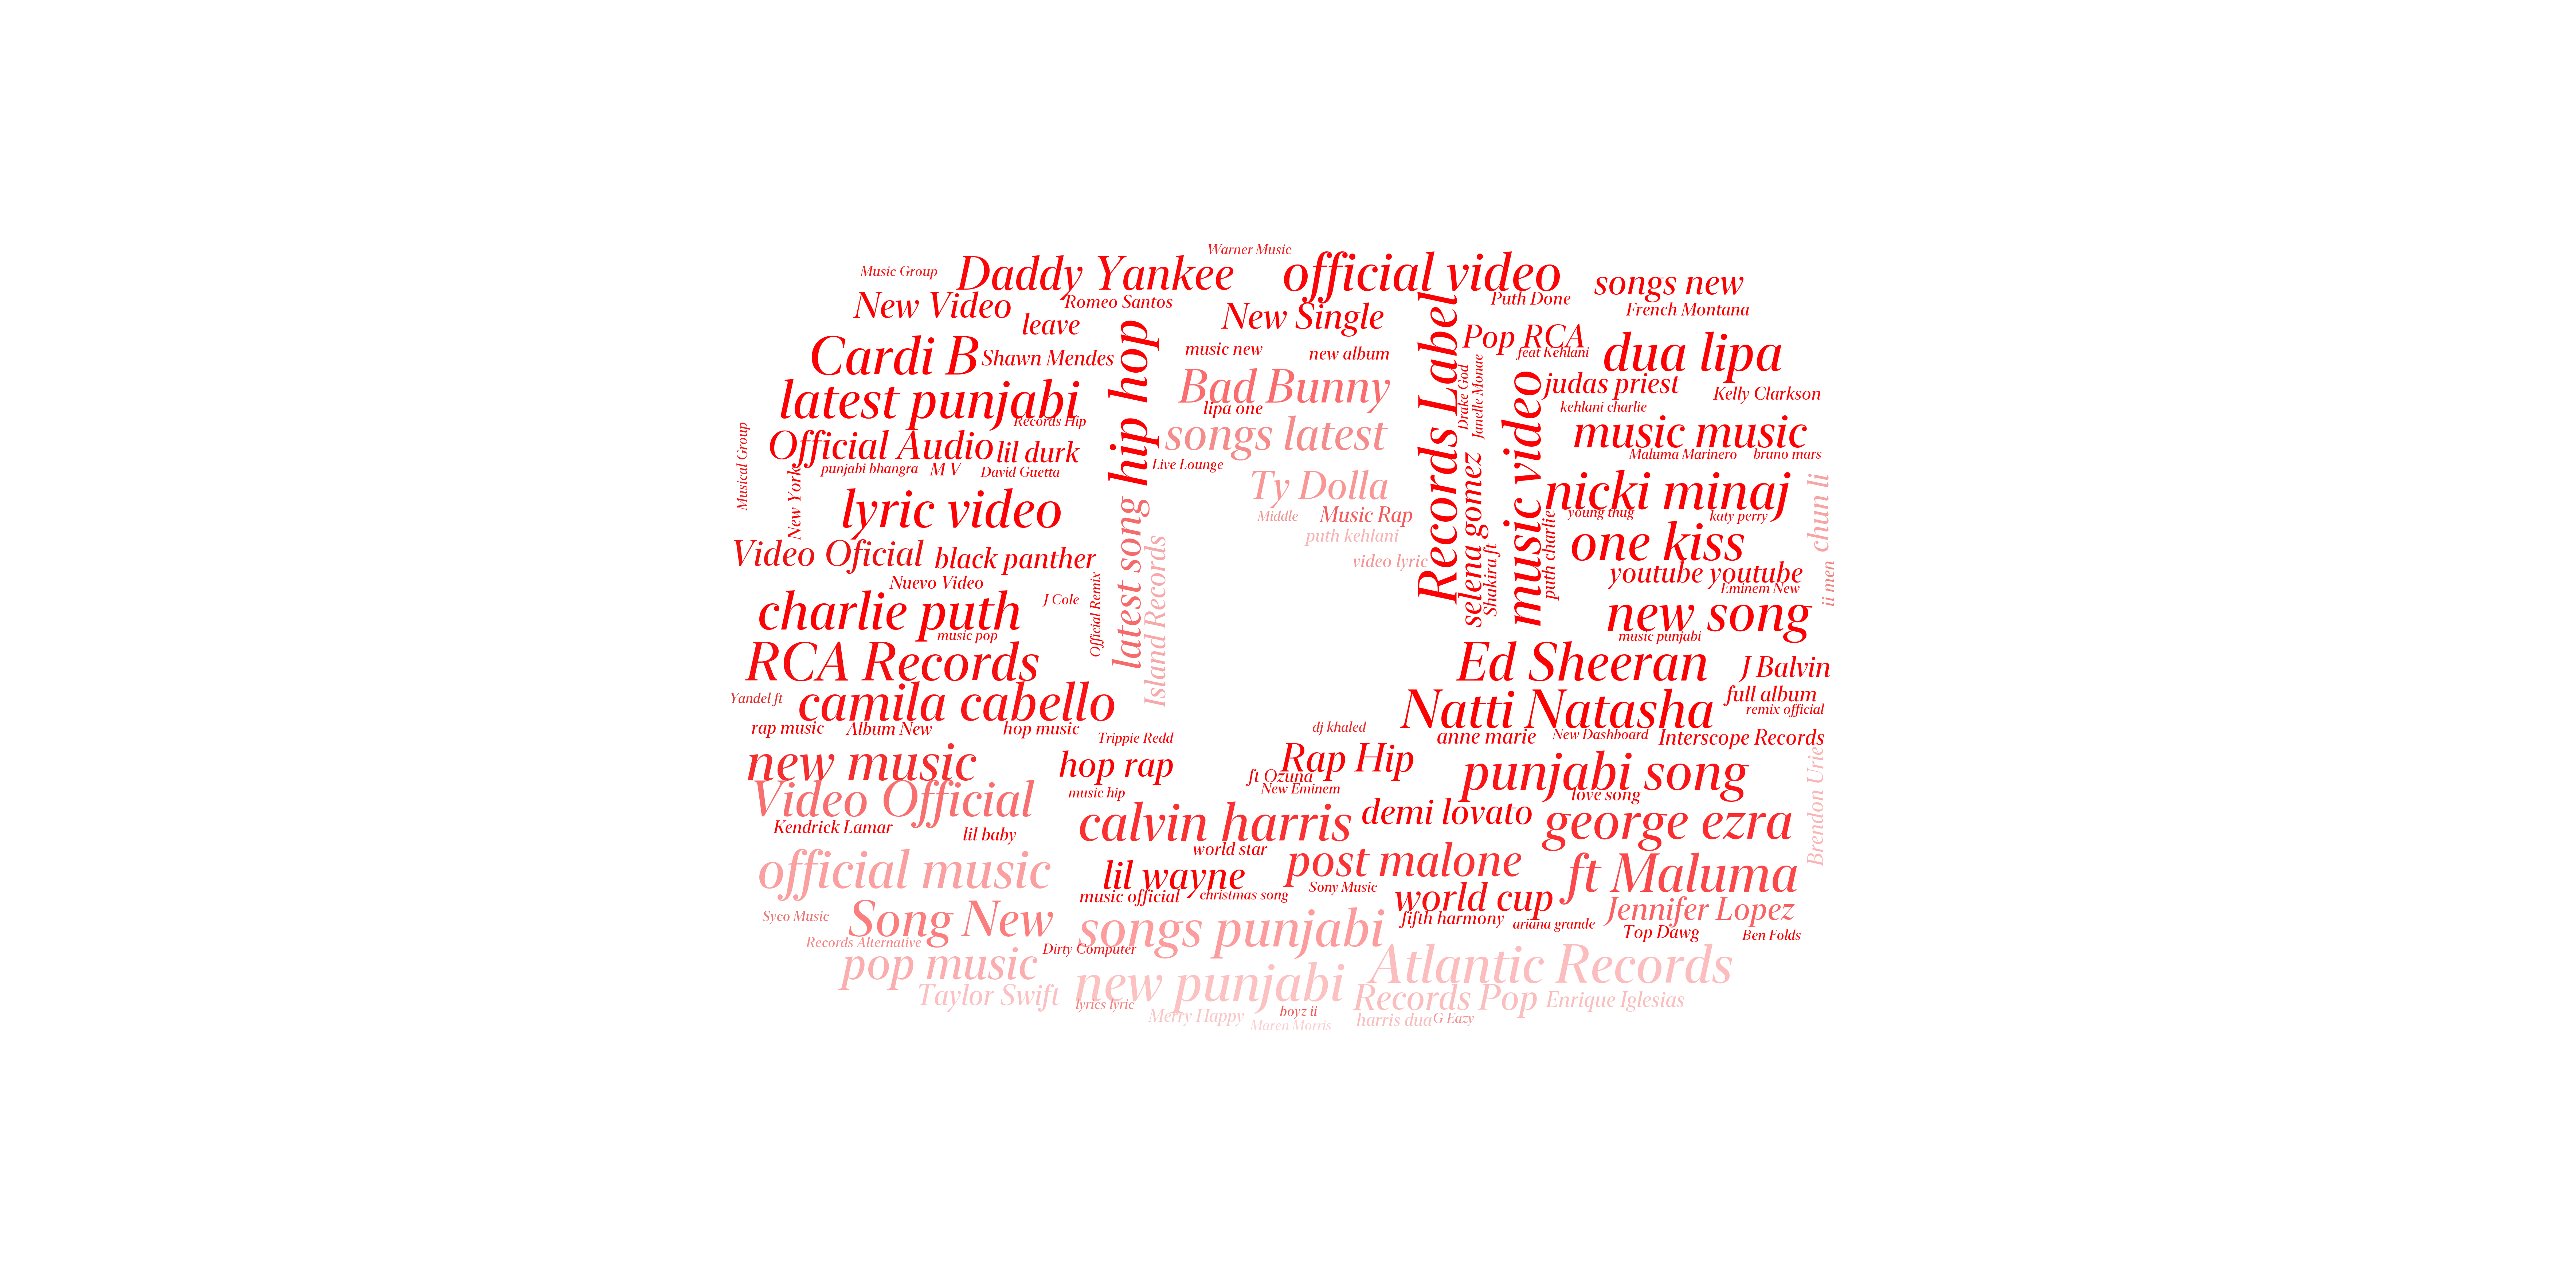

# Forth part: Texual Analysis & Linear Regression

In [85]:
df_CA = pd.read_excel('CA.xlsx')
df_GB = pd.read_excel('GB.xlsx')
df_US = pd.read_excel('US.xlsx')
df_CA.head()

Unnamed: 0     video_id trending_date  \
0           0  n1WpP7iowLc    2017-11-14   
1           1  0dBIkQ4Mz1M    2017-11-14   
2           2  5qpjK5DgCt4    2017-11-14   
3           3  d380meD0W0M    2017-11-14   
4           4  2Vv-BfVoq4g    2017-11-14   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id        publish_time  \
0           10 2017-11-10 17:00:03   
1           23 2017-11-13 17:00:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-12 18:01:41   
4           10 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description       category  \
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music   
1  STill got a lot of packages. Probably will las...         Comedy   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy   
3  I know it's been a while since we did this sho...  Entertainment   
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music   

  publish_date  
0   2017-11-10  
1   2017-11-13  
2   2017-11-12  
3   2017-11-12  
4   2017-11-09

In [144]:
title_US = df_US['title']
tags_US = df_US['tags']
views_US = df_US['views']
likes_US = df_US['likes']
comment_count_US = df_US['comment_count']
dislikes_US = df_US['dislikes']
description_US = df_US['description']

title_CA = df_CA['title']
tags_CA = df_CA['tags']
views_CA = df_CA['views']
likes_CA = df_CA['likes']
comment_count_CA = df_CA['comment_count']
dislikes_CA = df_CA['dislikes']
description_CA = df_CA['description']

title_GB = df_GB['title']
tags_GB = df_GB['tags']
views_GB = df_GB['views']
likes_GB = df_GB['likes']
comment_count_GB = df_GB['comment_count']
dislikes_GB = df_GB['dislikes']
description_GB = df_GB['description']


#### 文本处理 - 提取标题长度、tag数量、description长度

In [62]:
title_US_length = []
spe_cha = '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?'
for i in range(39065):
    lines = title_US[i]
    for ch in spe_cha:  
        lines = lines.replace(ch," ")
    words = lines.split()
    title_US_length.append(len(words))
#print (title_US_length)

In [63]:
tags_US_length = []
for i in range(39065):
    tag = tags_US[i]
    ts = tag.count('|') + 1
    tags_US_length.append(ts)
    #print (ts)

In [64]:
des_US_length = []
for i in range(39065):
    string = description_US[i]
    string = re.sub(r'\\n','\n',string)
    string = re.sub(r'-','\n',string)
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    string = re.sub(results,'',string)
    string.rstrip() 
    for ch in '~`!@#$%^&*()_-+={}[]|\/:""<>,.;?':
        string = string.replace(ch," ")
    words = string.split()
    #print(len(words))
    des_US_length.append(len(words))
    #print(len(words))

In [65]:
title_US_length = pd.DataFrame(title_US_length,columns = ['title_len'])
des_US_length = pd.DataFrame(des_US_length,columns = ['des_len'])
tags_US_length = pd.DataFrame(tags_US_length,columns = ['tags_len'])

In [66]:
result1_US = pd.concat([df_US, title_US_length], axis=1, join='inner')
result2_US = pd.concat([result1_US, tags_US_length], axis=1, join='inner')
result3_US = pd.concat([result2_US, des_US_length], axis=1, join='inner')

### 4.1 Correlation Heatmap

In [67]:
result3_US.corr()

category_id     views     likes  dislikes  comment_count  \
category_id       1.000000 -0.173837 -0.179457 -0.048968      -0.089832   
views            -0.173837  1.000000  0.849943  0.559074       0.656525   
likes            -0.179457  0.849943  1.000000  0.515023       0.853326   
dislikes         -0.048968  0.559074  0.515023  1.000000       0.623567   
comment_count    -0.089832  0.656525  0.853326  0.623567       1.000000   
title_len         0.070077 -0.052342 -0.088512 -0.026676      -0.065044   
tags_len          0.149938 -0.040223 -0.067435 -0.005971      -0.031105   
des_len           0.079884 -0.032133 -0.043177 -0.022602      -0.024439   

               title_len  tags_len   des_len  
category_id     0.070077  0.149938  0.079884  
views          -0.052342 -0.040223 -0.032133  
likes          -0.088512 -0.067435 -0.043177  
dislikes       -0.026676 -0.005971 -0.022602  
comment_count  -0.065044 -0.031105 -0.024439  
title_len       1.000000  0.140707  0.092445  
tags_len        0.140707  1.000000  0.292825  
des_len         0.092445  0.292825  1.000000

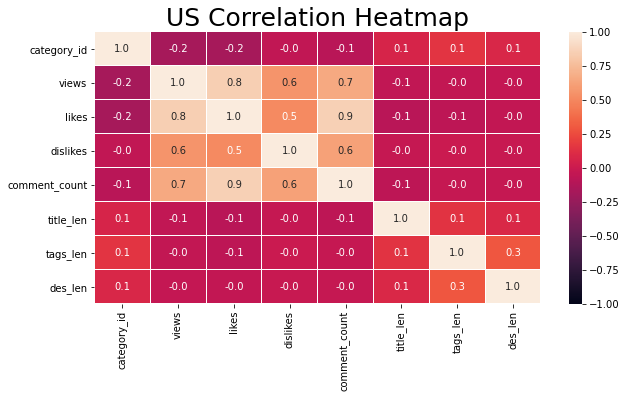

In [68]:
fig, axes = plt.subplots(figsize = (10,5))
sns.heatmap(result3_US.corr(), ax = axes, fmt = '.1f', annot= True, linewidths =.05,vmin = -1, vmax= 1).set_title('US Correlation Heatmap',fontsize = '25')
plt.show()

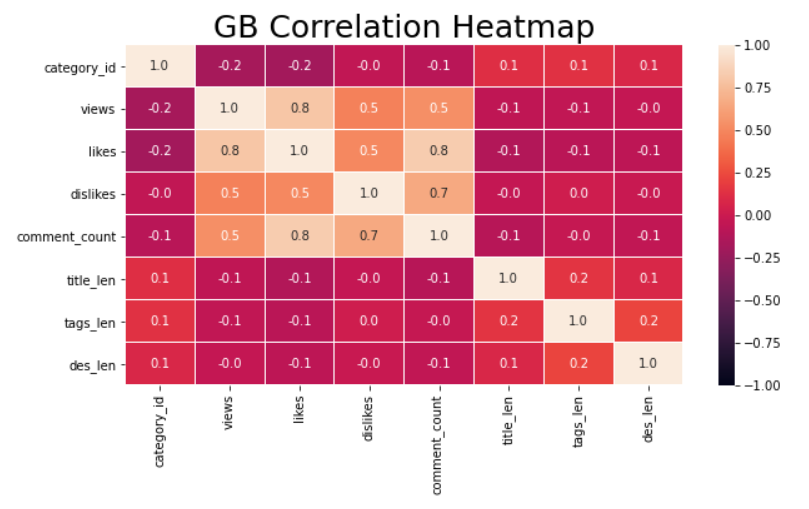

#### 从上图可以看出：
1. Views,likes,dislikes,comment_count两两之间相关系数大于等于0.5，具有较高的正相关性
2. title_len,tags_len,des_len分别与Views,likes,dislikes,comment_count的相关性几乎为零，不具有相关性
3. tags_len与des_len之间有0.3左右的微弱的正相关关系
4. 三个国家在上述变量间的相关性中基本趋于一致

In [69]:
tr_ar = np.array(df_US)
title_US_length = np.array(title_US_length).reshape(-1,1)
tags_US_length = np.array(tags_US_length).reshape(-1,1)
des_US_length = np.array(des_US_length).reshape(-1,1)
views_US = np.array(views_US).reshape(-1,1)
likes_US = np.array(likes_US).reshape(-1,1)
dislikes_US = np.array(dislikes_US).reshape(-1,1)
comment_count_US = np.array(comment_count_US).reshape(-1,1)

In [102]:
plt.style.use('Solarize_Light2')

#### views与likes进行线性拟合

R squared: 0.72240255


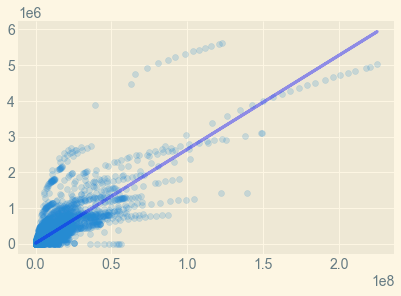

In [122]:
regr = linear_model.LinearRegression()
regr.fit(views_US,likes_US) #拟合（x,y）
y_pred = regr.predict(views_US)
print('R squared: %.8f' % r2_score(likes_US, y_pred))
# Plot outputs
plt.scatter(views_US,likes_US, alpha=0.2)
plt.plot(views_US, y_pred, color='blue', linewidth=3, alpha=0.4)

GB: R squared: 0.63559642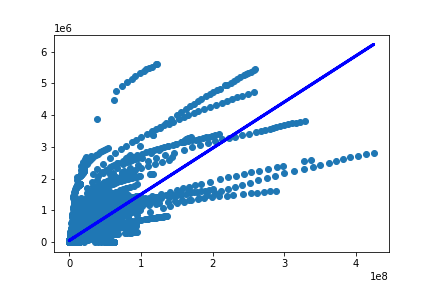

CA: R squared: 0.69270533

#### views与comment_count进行线性拟合

In [121]:
regr = linear_model.LinearRegression()
regr.fit(views_US,comment_count_US) #拟合（x,y）
y_pred = regr.predict(views_US)
print('R squared: %.8f' % r2_score(comment_count_US, y_pred))
# Plot outputs
plt.scatter(views_US,comment_count_US, alpha=0.2)
plt.plot(views_US, y_pred, color='blue', linewidth=3, alpha=0.4)

R squared: 0.43102542


GB: R squared: 0.28789386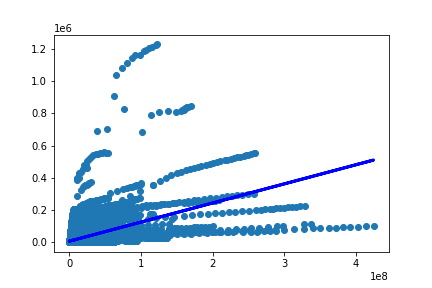

CA: R squared:0.50281408 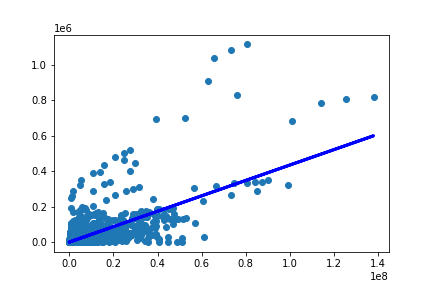

#### views与dislikes进行线性拟合

R squared: 0.31256329


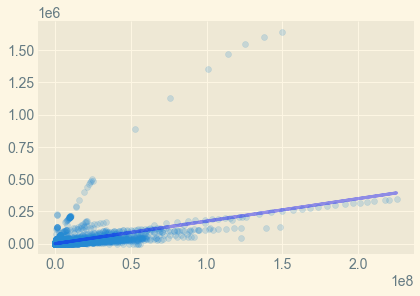

In [120]:
regr = linear_model.LinearRegression()
regr.fit(views_US,dislikes_US) #拟合（x,y）
y_pred = regr.predict(views_US)
print('R squared: %.8f' % r2_score(dislikes_US, y_pred))
# Plot outputs
plt.scatter(views_US,dislikes_US,alpha=0.2)
plt.plot(views_US, y_pred, color='blue', linewidth=3,alpha=0.4)

GB: R squared: 0.22706408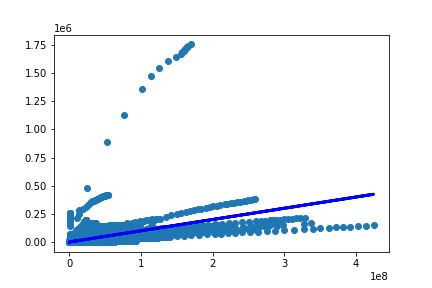

CA: R squared:0.31651747 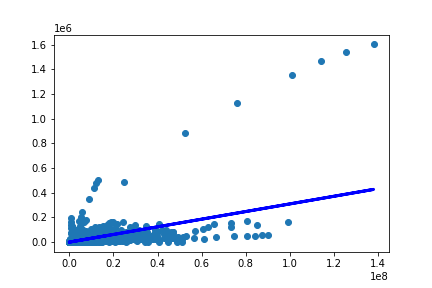

#### tags_length与des_length进行线性拟合

In [119]:
regr = linear_model.LinearRegression()
regr.fit(tags_US_length,des_US_length) #拟合（x,y）
y_pred = regr.predict(tags_US_length)
print('R squared: %.8f' % r2_score(des_US_length,y_pred))
# Plot outputs
plt.scatter(tags_US_length,des_US_length,#### views与dislikes进行线性拟合alpha=0.02)
plt.plot(tags_US_length, y_pred, color='blue', linewidth=3, alpha=0.4)

R squared: 0.08574669


GB: R squared: 0.04785860

CA: R squared: 0.06366117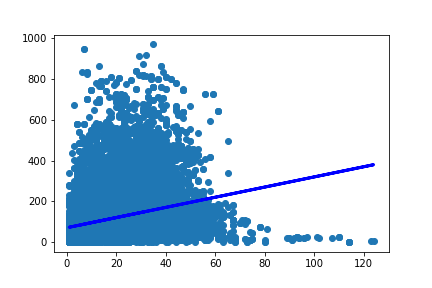

#### title_length与des_length进行线性拟合

R squared: 0.00854602


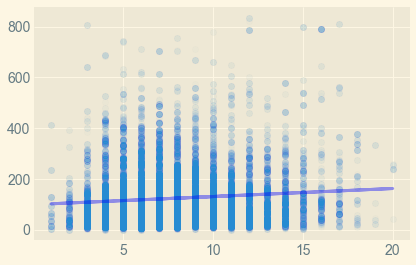

In [118]:
regr = linear_model.LinearRegression()
regr.fit(title_US_length,des_US_length) #拟合（x,y）
y_pred = regr.predict(title_US_length)
print('R squared: %.8f' % r2_score(des_US_length,y_pred))
# Plot outputs
plt.scatter(title_US_length,des_US_length,#### tags_length与des_length进行线性拟合 alpha=0.02)
plt.plot(title_US_length, y_pred, color='blue', linewidth=3, alpha=0.4)

GB: R squared:0.00623854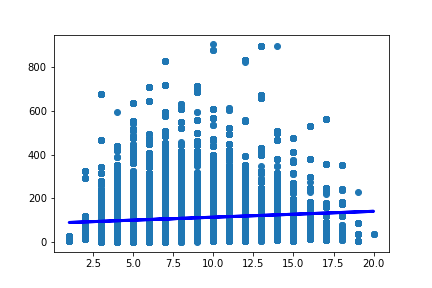

CA: R squared:0.02383270 

#### title_length与tags_length进行线性拟合

R squared: 0.01979857


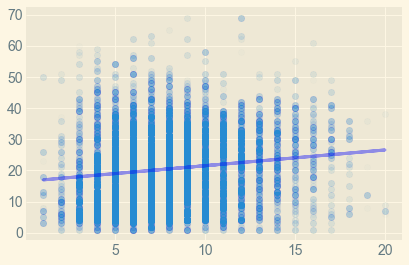

In [115]:
regr = linear_model.LinearRegression()
regr.fit(title_US_length,tags_US_length) #拟合（x,y）
y_pred = regr.predict(title_US_length)
print('R squared: %.8f' % r2_score(tags_US_length, y_pred))
# Plot outputs
plt.scatter(title_US_length,tags_US_length, alpha=0.02)
plt.plot(title_US_length, y_pred, color='blue'#### title_length与des_length进行线性拟合, linewidth=3,alpha=0.4)

GB: R squared:0.02333889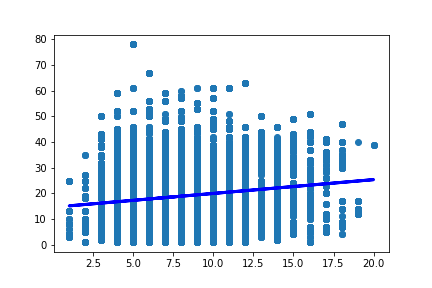

CA: R squared: 0.01135665

#### title_length与views进行一元多次回归 - only US data

In [123]:
for i in range(1,7#### title_length与tags_length进行线性拟合):
    poly_reg =PolynomialFeatures(degree=i)
    x_ploy = poly_reg.fit_transform(title_US_length)
    regr = linear_model.LinearRegression()
    regr.fit(x_ploy,views_US)
    y_train_pred =  regr.predict(x_ploy)
    score = regr.score(x_ploy, views_US)
    
    print ('\n')
    print('==================          一元 %s 次多项式回归结果           ================='%(i))
    print ('\n')
    print("model coefficients", regr.coef_)
    print("model intercept", regr.intercept_)

    x = sm.add_constant(x_ploy)
    reg = sm.OLS(views_US, x).fit()
   
    print(reg.summary())
    print ('\n')



==================          一元 1 次多项式回归结果           =================


model coefficients [[      0.         -121375.34666543]]
model intercept [3370450.79267025]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           4.09e-25
Time:                        23:32:40   Log-Likelihood:            -6.7394e+05
No. Observations:               39065   AIC:                         1.348e+06
Df Residuals:                   39063   BIC:                         1.348e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     38.47
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.53e-39
Time:                        23:32:40   Log-Likelihood:            -6.7390e+05
No. Observations:               39065   AIC:                         1.348e+06
Df Residuals:                   39059   BIC:                         1.348e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.747e+05   1.01e+06      0.471      0.6

# Fifth part: Sentiment Analysis - only description data from US dataset

In [124]:
df = pd.read_excel('US.xlsx')
df.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        category publish_date        publish_time  \
0           22  People & Blogs   2017-11-13 2017-11-13 17:13:01   
1           24   Entertainment   2017-11-13 2017-11-13 07:30:00   
2           23          Comedy   2017-11-12 2017-11-12 19:05:24   
3           24   Entertainment   2017-11-13 2017-11-13 11:00:04   
4           24   Entertainment   2017-11-12 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [125]:
df.shape

(39065, 15)

In [126]:
title = df['title']
tags = df['tags']
views = df['views']
likes = df['likes']
comment_count = df['comment_count']
dislikes = df['dislikes']
description = df['description']

#### 删除每行description的网址后，进行情感打分 - polarity & subjectivity

In [145]:
sentiment = []
for i in range(39065):
    string = df.loc[i, 'description']
    string = re.sub(r'\\n','\n',string)
    string = re.sub(r'-','\n',string)
    results = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
    string = re.sub(results,'',string)
    string.rstrip() 
    blob = TextBlob(string)
    sentiment.append(blob.sentiment)
print(sentiment[0:5])

[Sentiment(polarity=0.07291666666666669, subjectivity=0.3885416666666667), Sentiment(polarity=0.07916666666666666, subjectivity=0.3458333333333334), Sentiment(polarity=0.027083333333333348, subjectivity=0.4666666666666667), Sentiment(polarity=0.062373737373737366, subjectivity=0.44217171717171716), Sentiment(polarity=0.514090909090909, subjectivity=0.390909090909091)]


In [129]:
sent = re.findall(r'\d{0,1}\.\d+',str(sentiment))

In [130]:
polarity = []
subjectivity = []
for i in range(0,78130,2):
    polarity.append(float(sent[i]))
#print(polarity)
for i in range(1,78130,2):
    subjectivity.append(float(sent[i]))
#print(subjectivity)

In [131]:
pola = pd.DataFrame(polarity, columns = ['polarity'])
subjectivity = pd.DataFrame(polarity, columns = ['subjectivity'])
result1 = pd.concat([pola,views], axis=1,join='inner')
result2 = pd.concat([result1,subjectivity], axis=1,join='inner')
#result2['propo'] = result2['comment_count']/result2['views']
result2['views_log'] = pd.DataFrame(np.log(result2['views']))
result2 = result2.drop(['views'], axis=1,inplace=False)
result2 = result2.drop(result2[result2['polarity']>1].index)
result2.head()

polarity  subjectivity  views_log
0  0.072917      0.072917  13.525658
1  0.079167      0.079167  14.698775
2  0.027083      0.027083  14.975981
3  0.062374      0.062374  12.745975
4  0.514091      0.514091  14.555413

In [132]:
result2_ar = np.array(result2)
result2_ar

array([[ 0.07291667,  0.07291667, 13.52565813],
       [ 0.07916667,  0.07916667, 14.69877508],
       [ 0.02708333,  0.02708333, 14.9759809 ],
       ...,
       [ 0.14320501,  0.14320501, 13.87984687],
       [ 0.02478355,  0.02478355, 15.54907808],
       [ 0.16458333,  0.16458333, 16.14824835]])

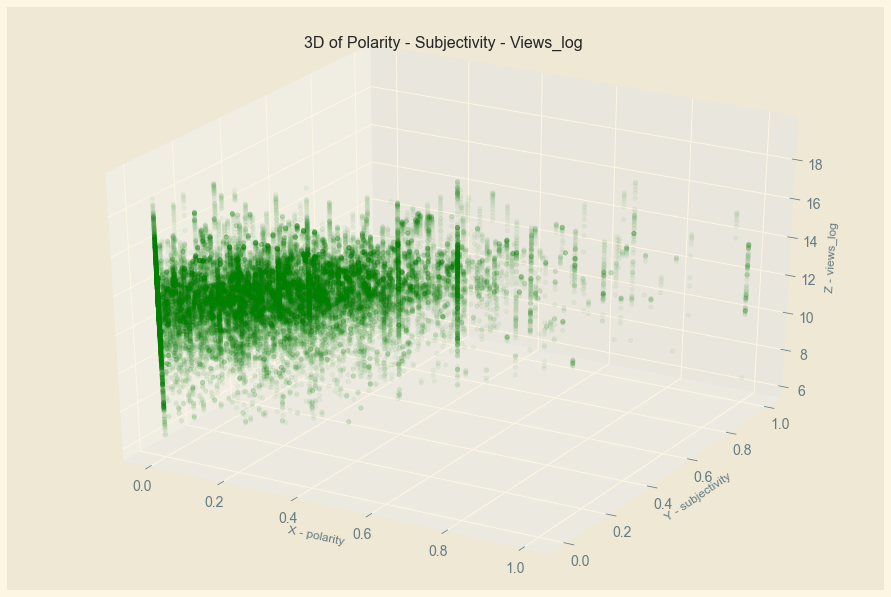

In [149]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d  
figure = plt.figure(figsize=(14,10))
axes = Axes3D(figure)

x = [x[0] for x in result2_ar]
y = [x[1] for x in result2_ar]
z = [x[2] for x in result2_ar]
 
ax = plt.subplot(projection = '3d')  
ax.set_title('3D of Polarity - Subjectivity - Views_log ')  
ax.scatter(x, y, z, c = 'g', alpha = 0.05)   
 
ax.set_xlabel('X - polarity')  
ax.set_ylabel('Y - subjectivity') 
ax.set_zlabel('Z - views_log')  
 
plt.show()

#### 从上图可以看出：
1. 情感极性polarity整体集中在[0,0.2]区间，主观性subjectivity集中在[0,0.8]之间，样本数据的description整体保持近中性的低乐观态度，但主观程度各有不同；极少数视频的description同时具有较乐观的态度和较强的主观性。
2. 给定(X - polarity, Y - subjectivity)下，views呈正态分布。

#### 逻辑回归的数据处理

In [135]:
pola = pd.DataFrame(polarity, columns = ['polarity'])
result1 = pd.concat([pola,views], axis=1,join='inner')
result2 = pd.concat([result1,comment_count], axis=1,join='inner')
result2['propo'] = result2['comment_count']/result2['views']
result2.head()

polarity    views  comment_count     propo
0  0.072917   748374          15954  0.021318
1  0.079167  2418783          12703  0.005252
2  0.027083  3191434           8181  0.002563
3  0.062374   343168           2146  0.006253
4  0.514091  2095731          17518  0.008359

In [136]:
result2 = result2.drop(result2[result2['polarity']>1].index)
result2.head()

polarity    views  comment_count     propo
0  0.072917   748374          15954  0.021318
1  0.079167  2418783          12703  0.005252
2  0.027083  3191434           8181  0.002563
3  0.062374   343168           2146  0.006253
4  0.514091  2095731          17518  0.008359

In [137]:
polarity = result2['polarity']
propo = result2['propo']
# mean = np.mean(propo)
# mean
result2['propo_cl'] = result2['propo'].map(lambda s :1  if s >= result2['propo'].mean() else 0)
result2.head()

polarity    views  comment_count     propo  propo_cl
0  0.072917   748374          15954  0.021318         1
1  0.079167  2418783          12703  0.005252         1
2  0.027083  3191434           8181  0.002563         0
3  0.062374   343168           2146  0.006253         1
4  0.514091  2095731          17518  0.008359         1

#### 逻辑回归

In [138]:
result2_data = np.array(result2)

In [139]:
X = result2_data[:,0]  
y = result2_data[:,-1]
y = y.astype('int') #转化为整数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [140]:
print(X_train.shape)
print(X_test.shape)

(29293,)
(9765,)


In [141]:
model1 = linear_model.LogisticRegression()
Xlr_train = X_train.reshape(-1, 1)
Xlr_test = X_test.reshape(-1, 1)

model1.fit(Xlr_train,y_train.astype('int'))
print('Coefficient: ', model1.coef_)
print('Intercept: ', model1.intercept_)

ylr_pred = model1.predict(Xlr_test)
ylr_pred_prob =  model1.predict_proba(Xlr_test)

Coefficient:  [[0.01298807]]
Intercept:  [-0.77652176]


In [142]:
from sklearn.metrics import confusion_matrix

CM_lr = confusion_matrix(y_test, ylr_pred)
print(CM_lr)

[[6649    0]
 [3116    0]]


In [151]:
#Calculate out-of-sample AUC
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test.astype('int'), ylr_pred_prob[:,1])
#Draw the ROC curve
plt.plot(fpr,tpr,marker = 'o',alpha = 0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
auc(fpr, tpr)

0.5007788772467836